<a href="https://colab.research.google.com/github/italloalexsander/LeNet-Keras-Colab/blob/master/trabalho_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeiro trabalho da disciplina

Nome: Itallo Alexsander da Fonseca Ribeiro

Especificação:

Desenvolver a LeNet5, e realizar testes empíricos sobre o banco MNist (http://yann.lecun.com/exdb/mnist/), avaliando alterações:

1. No tamanho dos filtros

2. No número de filtros por camada

3. No tamanho do batch

4. Na taxa de aprendizagem

5. No aumento de dados

6. Nas funções de ativação e na inicialização dos pesos, testando as quatro combinações de Leak ReLU ou tanh x inicialização de Glorot ou de He. 

Data de entrega: 01/08


In [0]:
!pip install tensorflow-gpu

     |████████████████████████████████| 377.0MB 59kB/s 


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 2, 2, 120)         17400     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 1, 1, 120)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 120)               0         
__________

TypeError: ignored

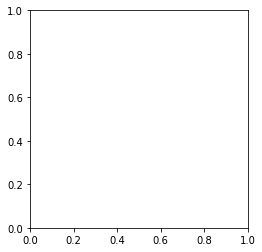

In [0]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

tamBatch = 256
numEpocas = 10

imgX, imgY = 28, 28
numClasses = 10 

(x_train, y_train), (x_val, y_val) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], imgX, imgY, 1)
x_val = x_val.reshape(x_val.shape[0], imgX, imgY, 1)

input_format = (imgX, imgY, 1)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')

x_train /= 255
x_val /= 255

y_train = to_categorical(y_train, numClasses)
y_val = to_categorical(y_val, numClasses)

model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=input_format))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=120, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(numClasses, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=tamBatch, validation_data=(x_val, y_val), verbose = 1, epochs = numEpocas)
score = model.evaluate(x_val, y_val, verbose=0)
print('Valor de perda: ', score[0])
print('Valor de acurácia: ', score[1])


